In [1]:
#Importing all required  libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Importing csv files 
features= pd.read_csv('features.csv')
train_data = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
test= pd.read_csv('test.csv')





In [2]:
# Data cleaning
# Checking out null values in features

features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

As we have few NaN for CPI and Unemployment, therefore we fill the missing values with their respective column mean. And as MarkDowns have more missing values we impute zeros in missing places respectively

In [3]:
from statistics import mean

features['CPI'] = features['CPI'].fillna(mean(features['CPI']))
features['Unemployment'] = features['Unemployment'].fillna(mean(features['Unemployment']))
features['MarkDown1'] = features['MarkDown1'].fillna(0)
features['MarkDown2'] = features['MarkDown2'].fillna(0)
features['MarkDown3'] = features['MarkDown3'].fillna(0)
features['MarkDown4'] = features['MarkDown4'].fillna(0)
features['MarkDown5'] = features['MarkDown5'].fillna(0)

In [4]:
features.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

Merging(adding) all features with training data

In [6]:
new_data = pd.merge(features, train_data, on=['Store','Date','IsHoliday'], how='inner')

# merging(adding) all stores info with new training data
final_data = pd.merge(new_data,stores,how='inner',on=['Store'])

# sorting data with respect to date
final_data = final_data.sort_values(by='Date')

final_data


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,3,14612.19,B,103681
330762,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,4,26323.15,B,103681
330763,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,5,36414.63,B,103681
330764,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,6,11437.81,B,103681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,49,7770.71,A,219622
128052,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,50,1486.00,A,219622
128053,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,52,4738.93,A,219622
390991,41,2012-10-26,41.80,3.686,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,False,4,32699.78,A,196321


In [6]:
final_data.describe()

final_data.to_csv('PythonExport.csv')

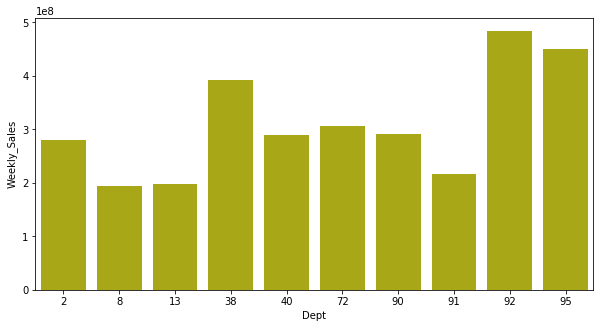

In [6]:
# Descriptive Statistics

#Top department according to sales


top_dept_sales = final_data.groupby(['Dept'])['Weekly_Sales'].sum()


df_dept = pd.DataFrame(top_dept_sales).sort_values('Weekly_Sales', ascending = False).head(10)

df_dept

f, ax = plt.subplots(figsize=(10, 5))
fig = sns.barplot( x=df_dept.index,y='Weekly_Sales', data= df_dept,color ='y')

# Department 92 and 95 seems to give max weekly sales and company should focusd on the top sales giving department
# and accordingly plan inventory


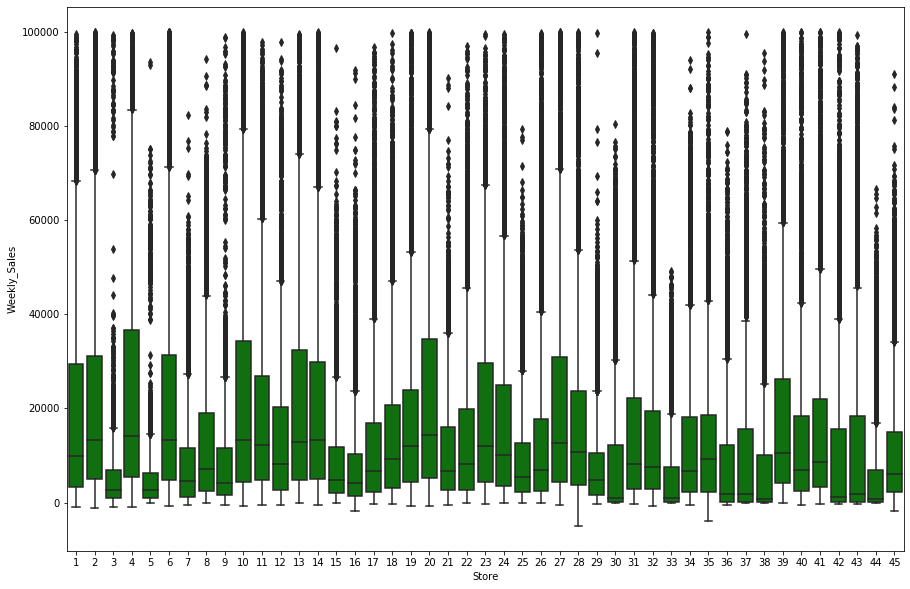

In [7]:
# Box plot for stores weekly sales
# Filter to get rid of outliers values

weekly_sales_filter = 100000
walmart_sales_filter= final_data[final_data.Weekly_Sales<weekly_sales_filter]
store_data = pd.concat([final_data['Store'], final_data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=walmart_sales_filter ,color ='g')

# Some stores like store 4,10,13,20 are among the top sales stores. This can be affected by the size and location of the stores

In [8]:
#Top Stores according to Sales to get exact idea about the store number and which type it belongs to


top_store_sales = final_data.groupby(['Store', 'Type']).sum()['Weekly_Sales']
top_store_sales_sorted = top_store_sales.sort_values(ascending= False).head(10)

df = pd.DataFrame(top_store_sales_sorted)
df



,,Weekly_Sales
Store,Type,
20,A,3.013978e+08
4,A,2.995440e+08
14,A,2.889999e+08
13,A,2.865177e+08
2,A,2.753824e+08
10,B,2.716177e+08
27,A,2.538559e+08
6,A,2.237561e+08
1,A,2.224028e+08


Exploratory Data Analysis


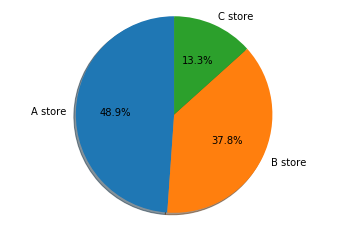

In [9]:
# Size wise store type distribition

labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

# A type of store seems to have maximum distribution 

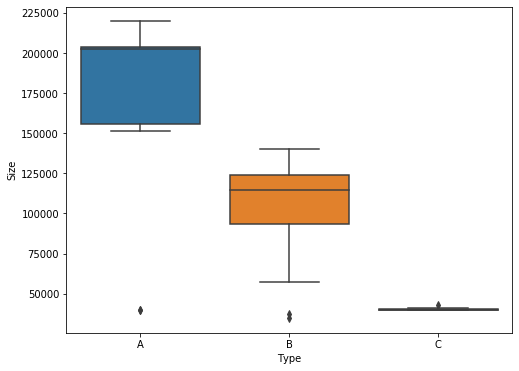

In [10]:
# boxplot for sizes of types of stores


store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

# Size of A type of store is maximum which means that weekly sales are being affected by the store size 
# because top stores shows A type

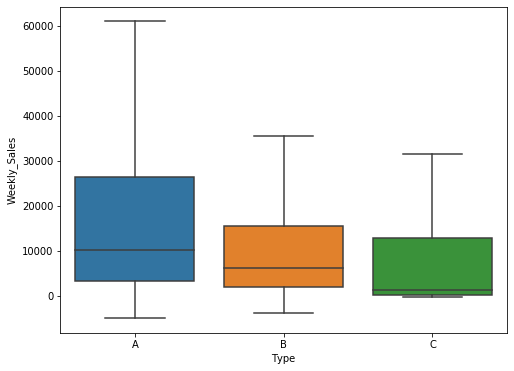

In [11]:
#boxplot for weekly sales for different types of stores


store_sale = pd.concat([stores['Type'], train_data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=final_data, showfliers=False)

In [12]:
# total count of sales on holidays and non holidays

a=print('Sales on non-holiday : ',train_data[train_data['IsHoliday']==False]['Weekly_Sales'].count().round(1))
b=print('Sales on holiday : ',train_data[train_data['IsHoliday']==True]['Weekly_Sales'].count().round(1))


Sales on non-holiday :  391909
Sales on holiday :  29661


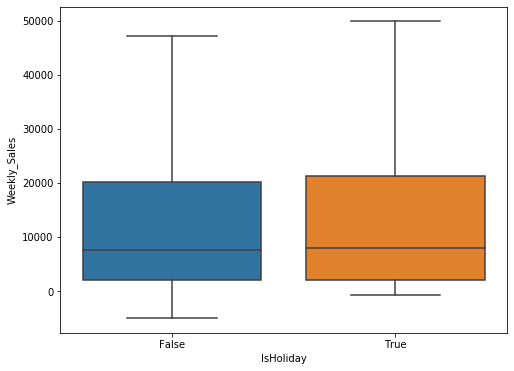

In [14]:
#Boxplot for weekly sales w.r.t holidays

holiday_sale = pd.concat([final_data['IsHoliday'], final_data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='IsHoliday', y='Weekly_Sales', data = holiday_sale, showfliers=False)

# Sales on holidays seems to be higher than non holidays

Text(0, 0.5, 'Weekly_Sales')

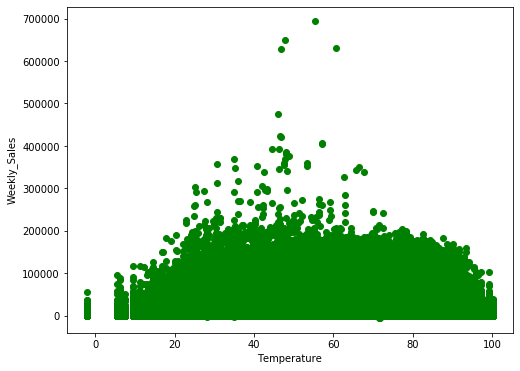

In [15]:
# Weekly sales w.r.t temperature

Sales_temp = pd.concat([final_data['Temperature'], final_data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = plt.scatter(x='Temperature', y='Weekly_Sales', data=Sales_temp, color ='g')
ax.set_xlabel("Temperature")
ax.set_ylabel("Weekly_Sales")


# Moderate temperature shows good sales

Text(0, 0.5, 'Weekly_Sales')

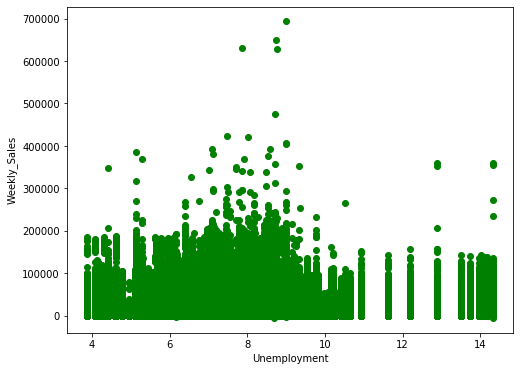

In [6]:
# Weekly sales w.r.t Unemployment

Sales_size = pd.concat([final_data['Unemployment'], final_data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = plt.scatter(x='Unemployment', y='Weekly_Sales', data=Sales_size, color ='g')
ax.set_xlabel("Unemployment")
ax.set_ylabel("Weekly_Sales")

# Size seems to be directly proportional to weekly sales

Text(0, 0.5, 'Weekly_Sales')

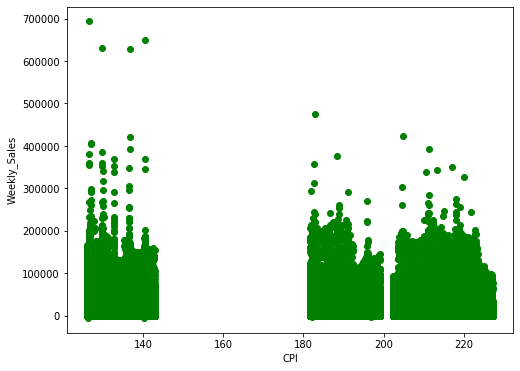

In [7]:
Sales_size = pd.concat([final_data['CPI'], final_data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = plt.scatter(x='CPI', y='Weekly_Sales', data=Sales_size, color ='g')
ax.set_xlabel("CPI")
ax.set_ylabel("Weekly_Sales")


[]

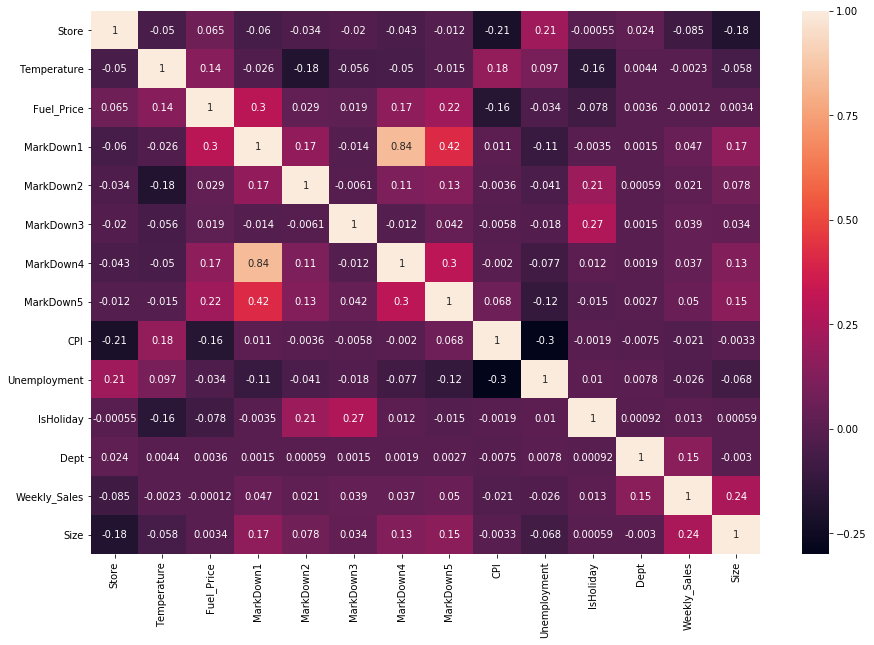

In [17]:
#Inferential Statistics

# Plotting correlation between all important features using Heatmap
corr = final_data.corr()
plt.figure(figsize=(15, 10))
heat_map= sns.heatmap(corr, annot=True)
bottom, top = heat_map.get_ylim()
heat_map.set_ylim(bottom + 0.5, top - 0.5)
plt.plot()


# Weekly sales seems to be mostly affected by Department and size of the store

<Figure size 1080x720 with 0 Axes>

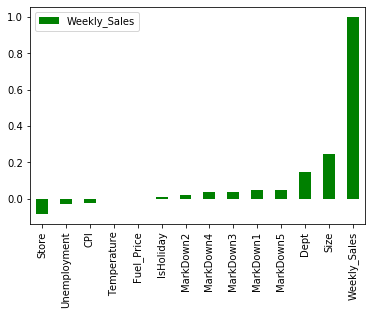

<Figure size 1080x720 with 0 Axes>

In [14]:
# Correlation of all features w.r.t weekly sales


correlation_sorted = corr.sort_values('Weekly_Sales')
Correlation_barplot = correlation_sorted.plot(y= 'Weekly_Sales', kind="bar", color='g')
plt.figure(figsize=(15, 10))



In [37]:
#Predictive Analysis

# Modeling
import calendar

In [7]:
# Introducing dummies for catagorical features(Type)

final_type = pd.get_dummies(final_data.Type)
X = pd.concat([final_data,final_type], axis=1)
X = X.drop(columns='Type')
#X = X.drop(columns='MarkDown1')
X =  X.drop(columns='MarkDown2')
X =  X.drop(columns='MarkDown3')
X =  X.drop(columns='MarkDown4')
#X =  X.drop(columns='Weekly_Sales')
#X =  X.drop(columns='Date')
#final_data['Date'].str.replace("-","")
#final_data[['Date']]=final_data['Date'].replace("-","").astype(int)
#final_data
X['Date'] = pd.to_datetime(X['Date'], format="%Y-%m-%d").dt.strftime("%Y%m%d").astype(int)
X
          



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,A,B,C
0,1,20100205,42.31,2.572,0.00,0.00,211.096358,8.106,False,1,24924.50,151315,1,0,0
330761,35,20100205,27.19,2.784,0.00,0.00,135.352461,9.262,False,3,14612.19,103681,0,1,0
330762,35,20100205,27.19,2.784,0.00,0.00,135.352461,9.262,False,4,26323.15,103681,0,1,0
330763,35,20100205,27.19,2.784,0.00,0.00,135.352461,9.262,False,5,36414.63,103681,0,1,0
330764,35,20100205,27.19,2.784,0.00,0.00,135.352461,9.262,False,6,11437.81,103681,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,20121026,46.97,3.755,10192.49,5563.92,131.193097,5.621,False,49,7770.71,219622,1,0,0
128052,13,20121026,46.97,3.755,10192.49,5563.92,131.193097,5.621,False,50,1486.00,219622,1,0,0
128053,13,20121026,46.97,3.755,10192.49,5563.92,131.193097,5.621,False,52,4738.93,219622,1,0,0
390991,41,20121026,41.80,3.686,4864.30,1524.43,199.219532,6.195,False,4,32699.78,196321,1,0,0


In [8]:
import calendar

final_data["Year"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.year
final_data["Day"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.day
final_data['Date'] = pd.to_datetime(final_data['Date'])
final_data['Month'] = pd.DatetimeIndex(final_data['Date']).month


X['Month'] = pd.DatetimeIndex(final_data['Date']).month
X['Month'] = final_data['Month'].apply(lambda x: calendar.month_abbr[x])
X['Year'] = pd.DatetimeIndex(final_data['Date']).year
X['Day'] = pd.DatetimeIndex(final_data['Date']).day
X

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,A,B,C,Month,Year,Day
0,1,20100205,42.31,2.572,0.00,0.00,211.096358,8.106,False,1,24924.50,151315,1,0,0,Feb,2010,5
330761,35,20100205,27.19,2.784,0.00,0.00,135.352461,9.262,False,3,14612.19,103681,0,1,0,Feb,2010,5
330762,35,20100205,27.19,2.784,0.00,0.00,135.352461,9.262,False,4,26323.15,103681,0,1,0,Feb,2010,5
330763,35,20100205,27.19,2.784,0.00,0.00,135.352461,9.262,False,5,36414.63,103681,0,1,0,Feb,2010,5
330764,35,20100205,27.19,2.784,0.00,0.00,135.352461,9.262,False,6,11437.81,103681,0,1,0,Feb,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,20121026,46.97,3.755,10192.49,5563.92,131.193097,5.621,False,49,7770.71,219622,1,0,0,Oct,2012,26
128052,13,20121026,46.97,3.755,10192.49,5563.92,131.193097,5.621,False,50,1486.00,219622,1,0,0,Oct,2012,26
128053,13,20121026,46.97,3.755,10192.49,5563.92,131.193097,5.621,False,52,4738.93,219622,1,0,0,Oct,2012,26
390991,41,20121026,41.80,3.686,4864.30,1524.43,199.219532,6.195,False,4,32699.78,196321,1,0,0,Oct,2012,26


In [89]:
X.to_csv('X(walmart.csv')

In [9]:
#train-test split

from sklearn.model_selection import train_test_split
y = X['Weekly_Sales']
X.drop("Weekly_Sales",inplace=True, axis=1)
X.drop("Month",inplace=True, axis=1)

X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.20, random_state=0)

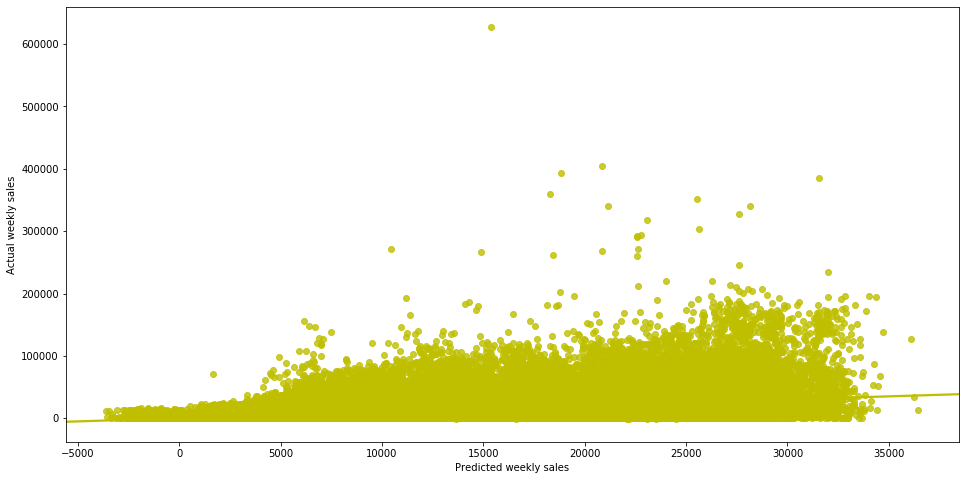

8.964944957325628


In [10]:
#Machine Learning Models

# LinearRegression
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)


plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test, color='y')
plt.xlabel('Predicted weekly sales')
plt.ylabel('Actual weekly sales')
plt.show()


Score_model1 = model_1.score(X_test,y_test)*100
print(Score_model1)









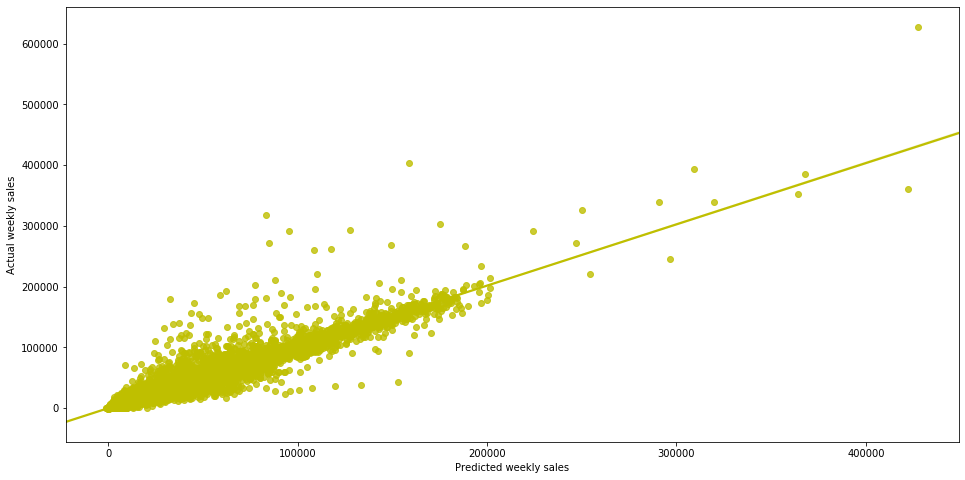

In [11]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor(n_estimators=100, n_jobs=1)
model_2.fit(X_train,y_train)

y_pred = model_2.predict(X_test)


plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test, color='y')
plt.xlabel('Predicted weekly sales')
plt.ylabel('Actual weekly sales')

plt.show()

In [12]:
score_model2 = model_2.score(X_test,y_test)*100
print(score_model2)




95.66699348441861


In [ ]:
import numpy as np
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model_2.set_params(n_estimators=n)
    model_2.fit(X_train, y_train)
    scores.append(model_2.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [30]:
# Weekly sales prediction and error using Random forest regressor

y_prediction_model2 = model_2.predict(X_test)

y_prediction_model2 = pd.DataFrame( data=y_prediction_model2,index=X_test.index)
y_prediction_model2

((y_prediction_model2[0]-y_test)**2).sum()/len(y_test)

22889836.600165818

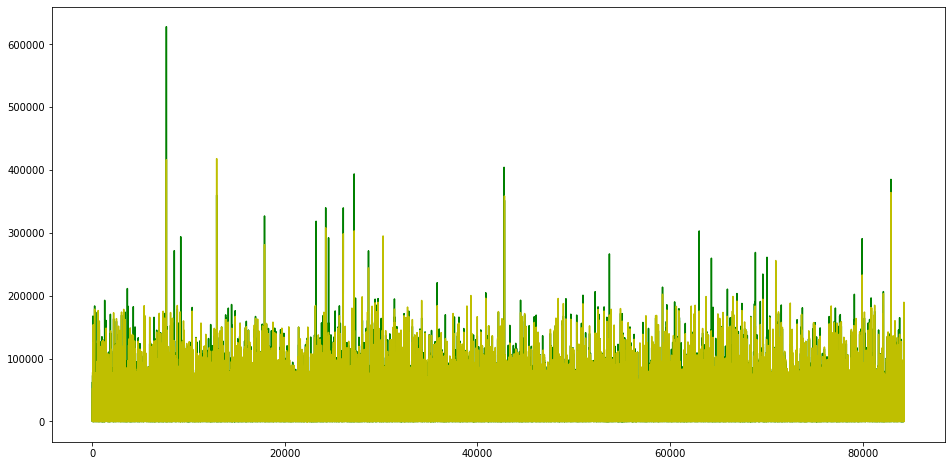

In [31]:
plt.figure(figsize=(16,8))
plt.plot(range(len(y_prediction_model2)),y_test, color='g')
plt.plot(range(len(y_prediction_model2)),y_prediction_model2, color='y')


In [32]:
# Weekly sales prediction and error using Linear regression model

y_prediction_model1 = model_1.predict(X_test)

y_prediction_model1 = pd.DataFrame( data=y_prediction_model1,index=X_test.index)
y_prediction_model1

((y_prediction_model1[0]-y_test)**2).sum()/len(y_test)

473467064.6482186

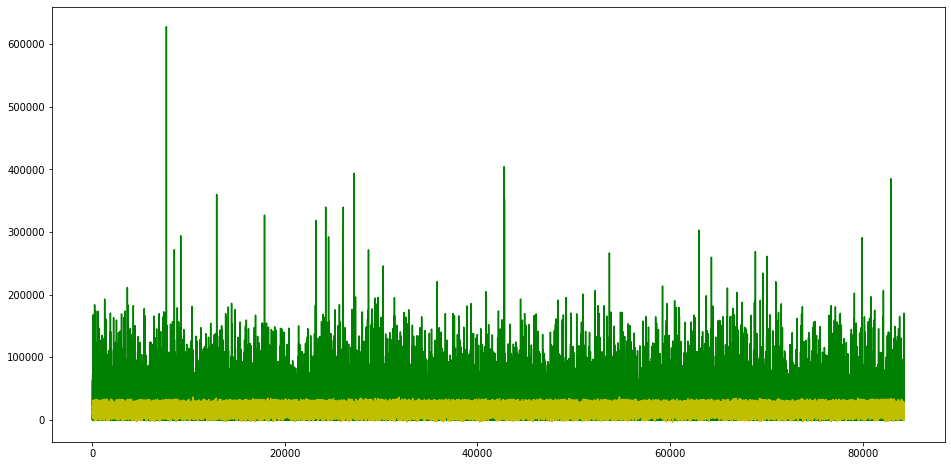

In [33]:
plt.figure(figsize=(16,8))
plt.plot(range(len(y_prediction_model1)),y_test, color='g')
plt.plot(range(len(y_prediction_model1)),y_prediction_model1, color='y')

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_prediction_model2[0])



22889836.600165818

In [36]:

y_prediction_model2 = pd.DataFrame( data=y_prediction_model2,index=X_test.index)

y_prediction_model2.to_csv('final Prediction Export Walmart.csv')